# Problem Statement

- An automobile consulting company to understand the factors on which the pricing of cars depends
    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

# Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [74]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Read data from csv file to data frame
car_price=pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', None)

# Data Understanding and Data preparation

In [77]:
car_price.shape

(205, 26)

In [78]:
car_price.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
# We can observe from below information there are no null rows on columns no need to drop any values because of NA
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [80]:
# We need to scale the data after train test split
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [81]:
# Need to drop car_ID column hence it is unique number Unique id of each observation.
car_price.drop('car_ID',axis=1,inplace=True)
car_price.shape

(205, 25)

In [82]:
# Dropping Duplicates if any
car_price=car_price.drop_duplicates()
car_price.shape

(205, 25)

### we will See pair plot for all data variables to understand data visually

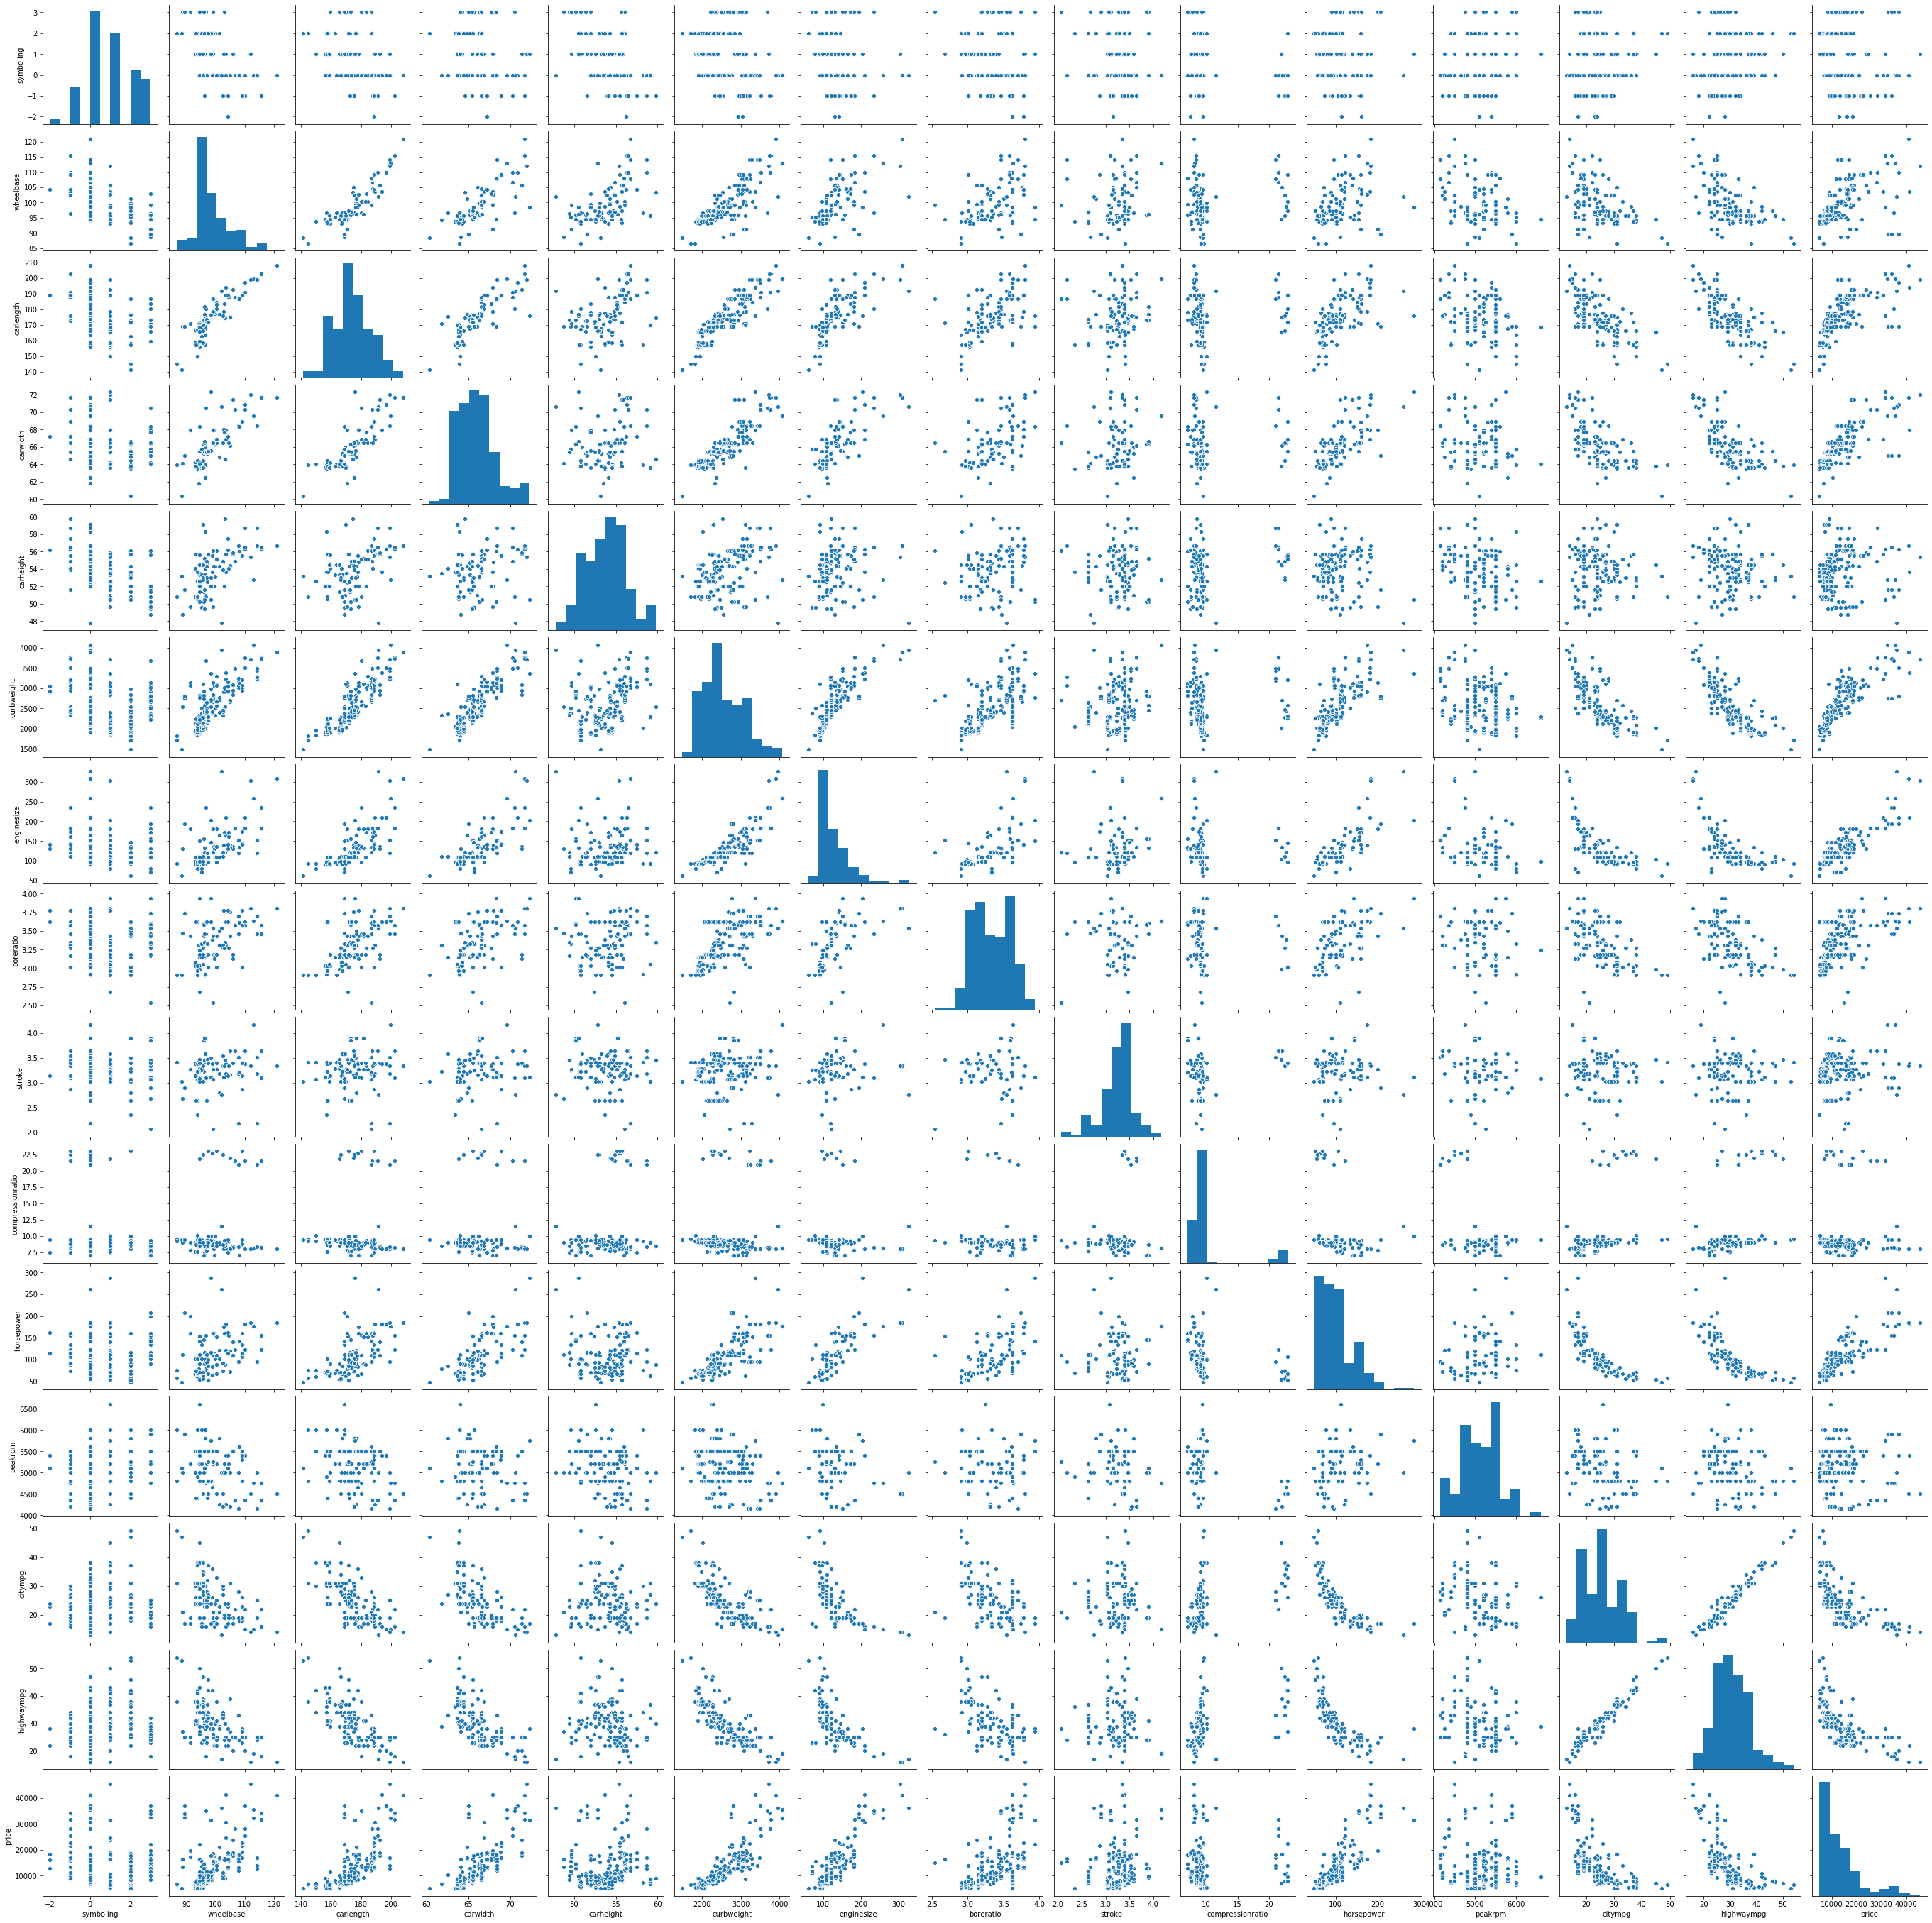

In [83]:
sns.pairplot(car_price)

By seeing pair plot we are confident that some features are linear with price we can impliment multiple linear regression

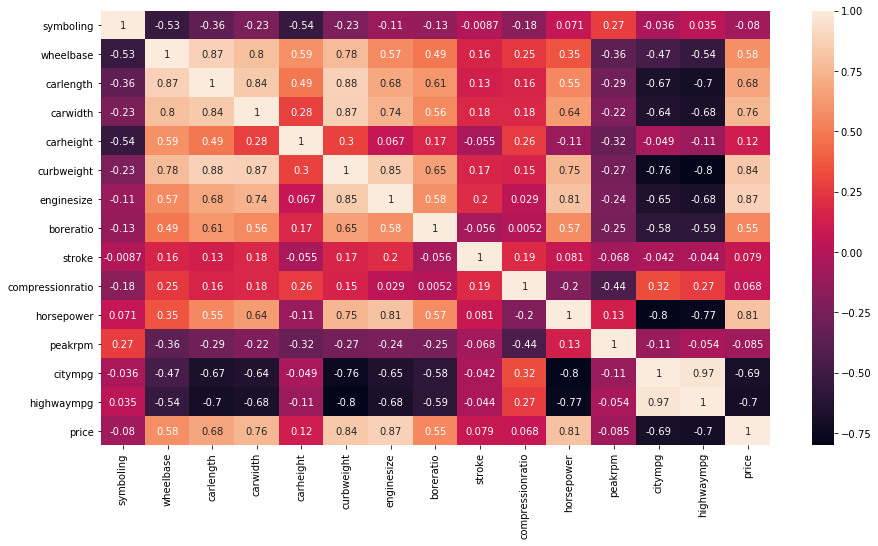

In [84]:
# We will draw heatmap for feature to see correlation between them.
plt.figure(figsize=(15,8))
sns.heatmap(car_price.corr(),annot=True)

In [85]:
car_price['CarName'].value_counts()

toyota corona                6
peugeot 504                  6
toyota corolla               6
subaru dl                    4
toyota mark ii               3
                            ..
toyota celica gt liftback    1
vokswagen rabbit             1
toyota corolla 1600 (sw)     1
chevrolet vega 2300          1
alfa-romero giulia           1
Name: CarName, Length: 147, dtype: int64

In [86]:
car_price['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [87]:
# Replace - with space most of the carname and model seperated by space
car_price['CarName']=car_price['CarName'].str.replace('-',' ')
#converting all carname column values to small case
car_price['CarName']=car_price['CarName'].str.lower()
# Spliting the car name and car model and save only car name
car_price['CarName']=car_price['CarName'].str.split(' ',expand=True)[0]

In [88]:
car_price['CarName'].value_counts()

toyota        31
nissan        18
mazda         15
mitsubishi    13
honda         13
subaru        12
peugeot       11
volvo         11
dodge          9
volkswagen     9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        4
isuzu          4
chevrolet      3
jaguar         3
alfa           3
vw             2
renault        2
maxda          2
mercury        1
vokswagen      1
porcshce       1
toyouta        1
Name: CarName, dtype: int64

In [89]:
# Some car comapny names are having some issue need to replace with proper names
car_price['CarName']=car_price['CarName'].replace('toyouta','toyota')
car_price['CarName']=car_price['CarName'].replace('maxda','mazda')
car_price['CarName']=car_price['CarName'].replace('vokswagen','volkswagen')
car_price['CarName']=car_price['CarName'].replace('vw','volkswagen')
car_price['CarName']=car_price['CarName'].replace('porcshce','porsche')
print(car_price['CarName'].unique())

['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


# Data Visualization 

#### For catagorical Features

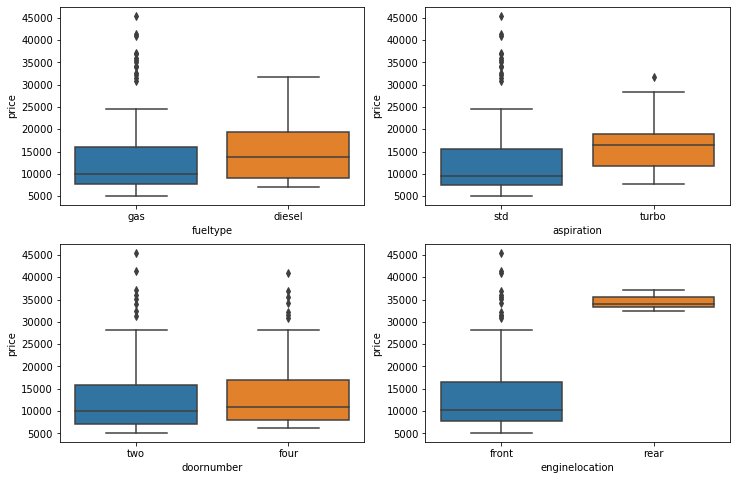

In [90]:
# Features which had 2 unique values
# fueltype,aspiration,doornumber,enginelocation
# fueltype gas & diesel, gas as 0 & diesel as 1
# aspiration std & turbo, turbo as 0 & std as 1
# doornumber two & four, two as 0 & four as 1
# enginelocation front & rear, rear as 0 and front as 1
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='fueltype',y='price',data=car_price)
plt.subplot(2,2,2)
sns.boxplot(x='aspiration',y='price',data=car_price)
plt.subplot(2,2,3)
sns.boxplot(x='doornumber',y='price',data=car_price)
plt.subplot(2,2,4)
sns.boxplot(x='enginelocation',y='price',data=car_price)

- observations:
    - For fueltype, aspiration and engine loacation we can see price is effecting them going forword <br>
      we can see how they related to each other and to price.
    - Doornumber almost same for price this feature will not much effect price

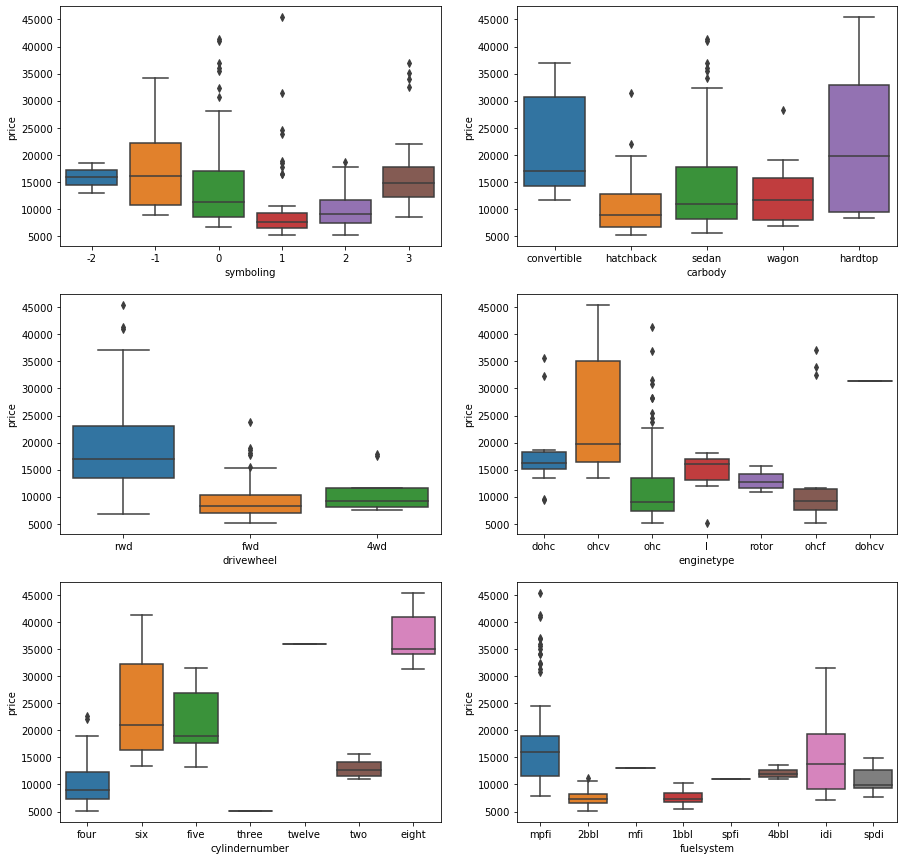

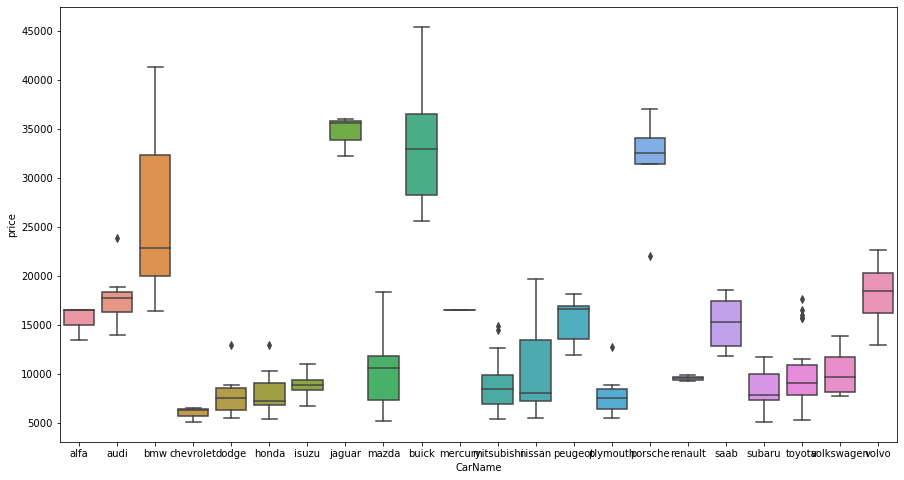

In [91]:
# Features which had more than 2 unique values
#'symboling','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(x='symboling',y='price',data=car_price)
plt.subplot(3,2,2)
sns.boxplot(x='carbody',y='price',data=car_price)
plt.subplot(3,2,3)
sns.boxplot(x='drivewheel',y='price',data=car_price)
plt.subplot(3,2,4)
sns.boxplot(x='enginetype',y='price',data=car_price)
plt.subplot(3,2,5)
sns.boxplot(x='cylindernumber',y='price',data=car_price)
plt.subplot(3,2,6)
sns.boxplot(x='fuelsystem',y='price',data=car_price)
plt.figure(figsize=(15,8))
sns.boxplot(x='CarName',y='price',data=car_price)

- Observations:
    - All features show varience with respect to price while module bulding we can observe how they correlated to price

# Outliers Handling

We find outliers and replace outliers with threshold values we cant drop rows we have very few test data best option to is to 
replace outliers

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


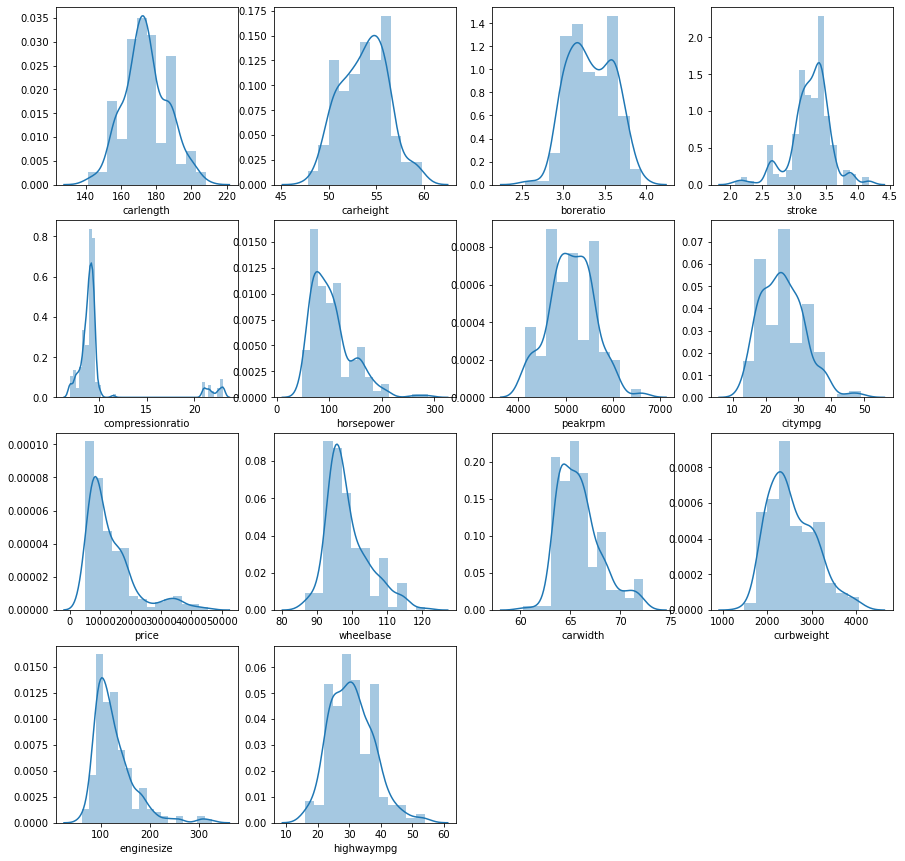

In [92]:
numeric_variables = list(car_price.columns[car_price.dtypes != 'object'])
print(numeric_variables)
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
sns.distplot(car_price['carlength'])
plt.subplot(4,4,2)
sns.distplot(car_price['carheight'])
plt.subplot(4,4,3)
sns.distplot(car_price['boreratio'])
plt.subplot(4,4,4)
sns.distplot(car_price['stroke'])
plt.subplot(4,4,5)
sns.distplot(car_price['compressionratio'])
plt.subplot(4,4,6)
sns.distplot(car_price['horsepower'])
plt.subplot(4,4,7)
sns.distplot(car_price['peakrpm'])
plt.subplot(4,4,8)
sns.distplot(car_price['citympg'])
plt.subplot(4,4,9)
sns.distplot(car_price['price'])
plt.subplot(4,4,10)
sns.distplot(car_price['wheelbase'])
plt.subplot(4,4,11)
sns.distplot(car_price['carwidth'])
plt.subplot(4,4,12)
sns.distplot(car_price['curbweight'])
plt.subplot(4,4,13)
sns.distplot(car_price['enginesize'])
plt.subplot(4,4,14)
sns.distplot(car_price['highwaympg'])


- observations:
    - compressionratio,enginesize and horsepower had outliers will hanlde them below.

In [93]:
# Will check values for horsepower,enginesize for 96% and compressionratio for 90% and 
print(car_price[['horsepower','enginesize']].quantile([0.01, .96]))
print(car_price[['compressionratio']].quantile([0.01, .90]))

      horsepower  enginesize
0.01       52.12        70.0
0.96      182.00       209.0
      compressionratio
0.01              7.00
0.90             10.94


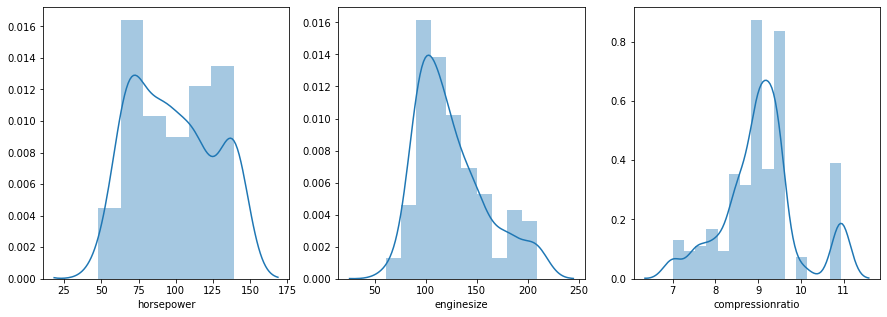

In [94]:
# We are replacing any values > 96% with threshold value.
car_price['horsepower']=car_price['horsepower'].apply(lambda x : 139.0 if x>139.0 else x)
car_price['enginesize']=car_price['enginesize'].apply(lambda x : 209.0 if x>209.0 else x)
car_price['compressionratio']=car_price['compressionratio'].apply(lambda x : 10.94 if x>10.94 else x)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(car_price['horsepower'])
plt.subplot(1,3,2)
sns.distplot(car_price['enginesize'])
plt.subplot(1,3,3)
sns.distplot(car_price['compressionratio'])

In [95]:
# Working on catagorical variables
# Columns which had 2 values can be converted to 0 and 1
# fueltype gas & diesel, gas as 0 & diesel as 1
# aspiration std & turbo, turbo as 0 & std as 1
# doornumber two & four, two as 0 & four as 1
# enginelocation front & rear, rear as 0 and front as 1
# replace drivewheel 
feature_dict={'fueltype':{'gas':0,'diesel':1},'aspiration':{'turbo':0,'std':1},'doornumber':{'two':0,'four':1},
              'enginelocation':{'rear':0,'front':1} }
car_price.replace(feature_dict,inplace=True)
car_price.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,0,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa,0,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa,0,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,139.0,5000,19,26,16500.0
3,2,audi,0,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,audi,0,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [96]:
# creating dummy variable for catagorical variable having more than 2 values
car_price=pd.get_dummies(car_price,columns=['symboling','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],
                          prefix=['symboling','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],
                        drop_first=True)
car_price.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,0,1,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,94.5,171.2,65.5,52.4,2823,152.0,2.68,3.47,9.0,139.0,5000,19,26,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,1,1,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,10.0,102.0,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,1,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,8.0,115.0,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
# After creating dummies list of columns.
print(car_price.columns)
print(car_price.shape)

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'en

# Train Test split

In [98]:
# Spliting the data to train and test data set
df_train,df_test=train_test_split(car_price,train_size=0.7,test_size=0.3,random_state=100)
print('data_shape      ',car_price.shape)
print('train_test_shape',df_train.shape)
print('test_test_shape ',df_test.shape)

data_shape       (205, 69)
train_test_shape (143, 69)
test_test_shape  (62, 69)


#### Scaling train data 

In [99]:
scaler=MinMaxScaler()
scale_ver=['carlength','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price',
           'wheelbase','carwidth','curbweight','enginesize','highwaympg']
df_train[scale_ver]=scaler.fit_transform(df_train[scale_ver])

In [100]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.090909,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.419628,0.497946,0.535389,0.522843,0.536617,0.400029,0.344211,0.374976,0.219310,0.090909,0.349650,0.300699,0.118881,0.125874,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.236266,0.207140,0.157843,0.220555,0.296063,0.196438,0.186165,0.188477,0.215682,0.288490,0.478536,0.460174,0.324786,0.332873,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.243243,0.305556,0.464646,0.406091,0.241758,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

# RFE to remove features 

In [101]:
# Assign price to y var and all other var to x var
y_train=df_train.pop('price')
x_train=df_train
x_train.shape

(143, 68)

In [102]:
# Using sklearn RFE to get top 12 features
lr = LinearRegression()
lr.fit(x_train, y_train)
rfe = RFE(lr, 12)
rfe = rfe.fit(x_train, y_train)

In [103]:
# Features with column name, RFE Stats, Rank
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 46),
 ('aspiration', False, 9),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 11),
 ('carlength', False, 27),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('horsepower', False, 10),
 ('peakrpm', False, 7),
 ('citympg', False, 47),
 ('highwaympg', False, 36),
 ('symboling_-1', False, 32),
 ('symboling_0', False, 34),
 ('symboling_1', False, 33),
 ('symboling_2', False, 35),
 ('symboling_3', False, 44),
 ('CarName_audi', False, 3),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 26),
 ('CarName_dodge', False, 15),
 ('CarName_honda', False, 19),
 ('CarName_isuzu', False, 45),
 ('CarName_jaguar', True, 1),
 ('CarName_mazda', False, 53),
 ('CarName_mercury', False, 55),
 ('CarName_mitsubishi', False, 8),
 ('CarName_nissan', False, 52),
 ('CarName_peugeot', False

In [104]:
# Columns we get after RFE applied
col = x_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_buick', 'CarName_jaguar',
       'CarName_porsche', 'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [105]:
# Columsn removed after RFE applied
x_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'CarName_audi', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fue

In [106]:
# Cerating X_test data with RFE selected Features
x_train_rfe=x_train[col]
x_train_rfe.head(5)

,enginelocation,carwidth,curbweight,enginesize,boreratio,stroke,CarName_bmw,CarName_buick,CarName_jaguar,CarName_porsche,cylindernumber_three,cylindernumber_two
122,1,0.291667,0.272692,0.250000,0.230159,0.525253,0,0,0,0,0,0
125,1,0.666667,0.500388,0.608108,1.000000,0.464646,0,0,0,1,0,0
166,1,0.308333,0.314973,0.250000,0.444444,0.449495,0,0,0,0,0,0
1,1,0.316667,0.411171,0.466216,0.626984,0.247475,0,0,0,0,0,0
199,1,0.575000,0.647401,0.466216,0.746032,0.484848,0,0,0,0,0,0


# Model  with 12 features selected from RFE

#### Function to build model

In [107]:
# Adding constant to x variable to use statsmodel
def build_model(X):
    x_train_sm=sm.add_constant(X)
    lr=sm.OLS(y_train,x_train_sm)
    lr_model=lr.fit()
    print(lr_model.summary())
    return lr_model

#### Vif Function

In [108]:
# VIF function to reuse
def VIF_cal(X):
    vif = pd.DataFrame()
    x = X
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1 

In [109]:
lr_model_1=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.35e-68
Time:                        22:05:50   Log-Likelihood:                 205.78
No. Observations:                 143   AIC:                            -385.6
Df Residuals:                     130   BIC:                            -347.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2474 

### VIF for the 12 features selected

In [110]:
# VIF value 
vif_1=VIF_cal(x_train_rfe)
vif_1

,Features,VIF
2,curbweight,45.69
1,carwidth,37.79
3,enginesize,33.17
0,enginelocation,26.32
5,stroke,17.09
4,boreratio,15.03
9,CarName_porsche,1.50
7,CarName_buick,1.49
8,CarName_jaguar,1.41
11,cylindernumber_two,1.39


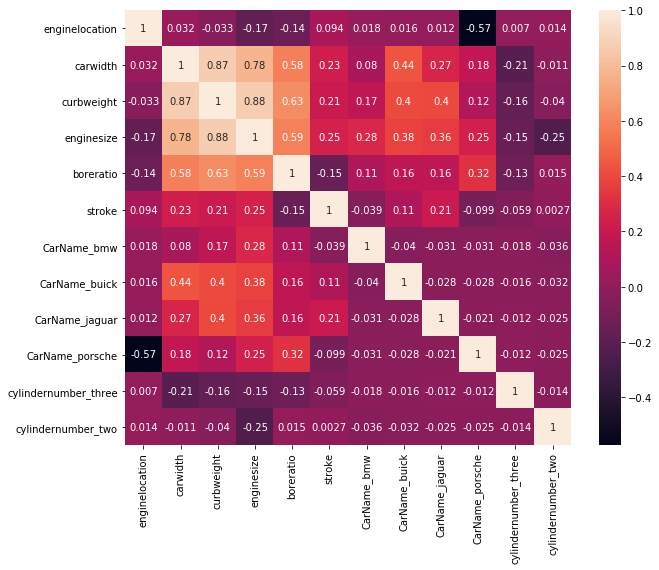

In [111]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8)) 
sns.heatmap(x_train_rfe.corr(),annot=True)

In [112]:
# removing CarName_isuzu it had high p value 
x_train_rfe.drop('curbweight',axis=1,inplace=True)

In [113]:
lr_model_2=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.29e-66
Time:                        22:05:51   Log-Likelihood:                 197.96
No. Observations:                 143   AIC:                            -371.9
Df Residuals:                     131   BIC:                            -336.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2501 

In [114]:
# VIF value 
vif_2=VIF_cal(x_train_rfe)
vif_2

,Features,VIF
0,enginelocation,26.10
1,carwidth,25.64
2,enginesize,21.32
4,stroke,16.88
3,boreratio,14.53
6,CarName_buick,1.48
5,CarName_bmw,1.36
7,CarName_jaguar,1.33
8,CarName_porsche,1.33
10,cylindernumber_two,1.30


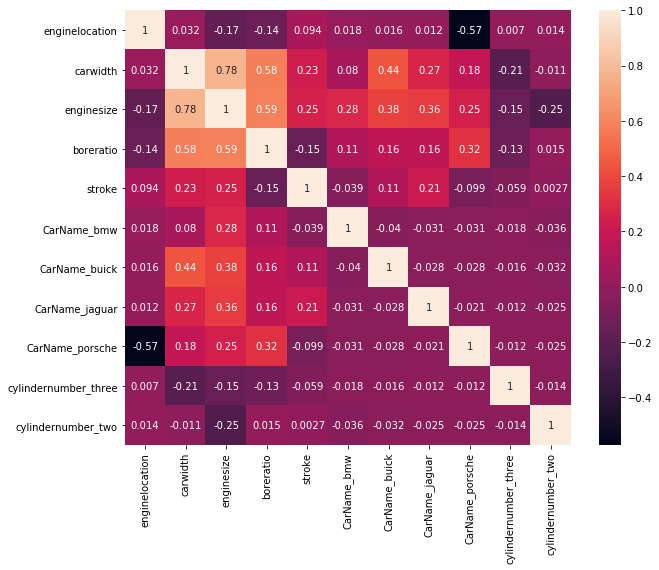

In [115]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8)) 
sns.heatmap(x_train_rfe.corr(),annot=True)

In [116]:
# removing enginetype_ohcv  it had high p value 
x_train_rfe.drop('enginelocation',axis=1,inplace=True)

In [117]:
lr_model_3=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.63e-64
Time:                        22:05:52   Log-Likelihood:                 189.41
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0687 

In [118]:
# VIF value 
vif_3=VIF_cal(x_train_rfe)
vif_3

,Features,VIF
0,carwidth,23.23
1,enginesize,19.41
2,boreratio,10.64
3,stroke,7.47
5,CarName_buick,1.45
4,CarName_bmw,1.34
6,CarName_jaguar,1.29
9,cylindernumber_two,1.28
7,CarName_porsche,1.23
8,cylindernumber_three,1.04


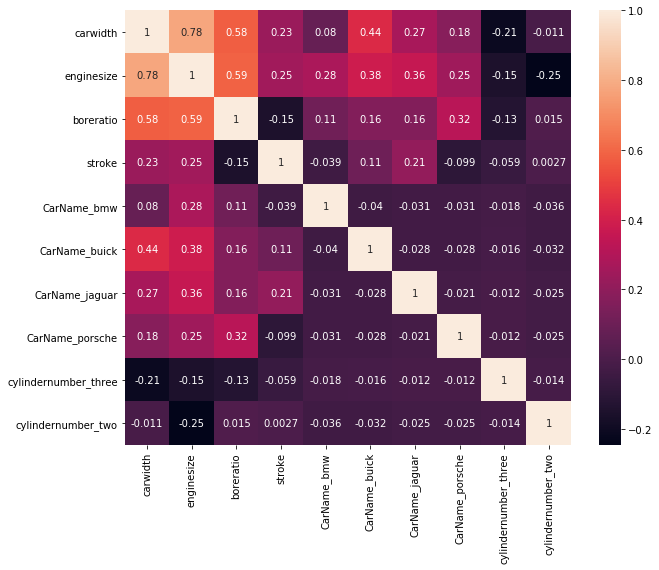

In [119]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8))
sns.heatmap(x_train_rfe.corr(),annot=True)

In [120]:
# removing carlength  it had high vif value 
x_train_rfe.drop('carwidth',axis=1,inplace=True)

In [121]:
lr_model_4=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.28e-55
Time:                        22:05:53   Log-Likelihood:                 165.64
No. Observations:                 143   AIC:                            -311.3
Df Residuals:                     133   BIC:                            -281.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0239 

In [122]:
# VIF value 
vif_4=VIF_cal(x_train_rfe)
vif_4

,Features,VIF
0,enginesize,14.11
1,boreratio,8.68
2,stroke,6.10
4,CarName_buick,1.40
3,CarName_bmw,1.30
5,CarName_jaguar,1.29
6,CarName_porsche,1.23
8,cylindernumber_two,1.21
7,cylindernumber_three,1.03


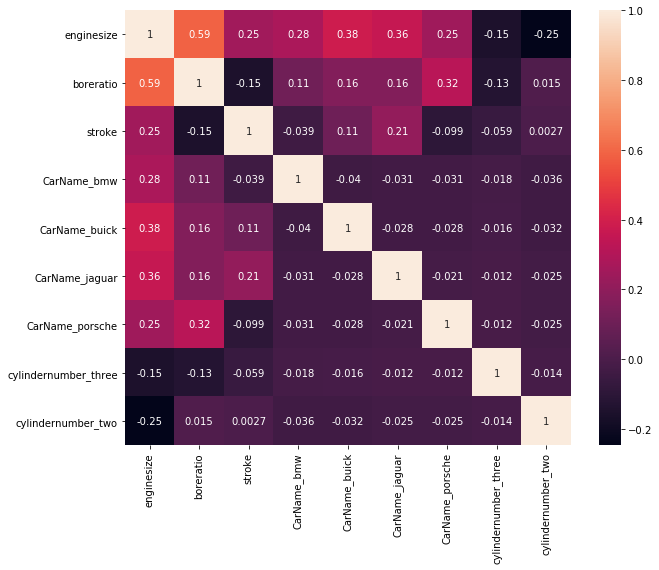

In [123]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8))
sns.heatmap(x_train_rfe.corr(),annot=True)

In [124]:
# removing carbody_wagon  it had high vif value 
x_train_rfe.drop('boreratio',axis=1,inplace=True)

In [125]:
lr_model_5=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.54e-56
Time:                        22:05:53   Log-Likelihood:                 165.31
No. Observations:                 143   AIC:                            -312.6
Df Residuals:                     134   BIC:                            -286.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0395 

In [126]:
# VIF value 
vif_5=VIF_cal(x_train_rfe)
vif_5

,Features,VIF
0,enginesize,7.87
1,stroke,5.89
3,CarName_buick,1.32
2,CarName_bmw,1.27
4,CarName_jaguar,1.22
5,CarName_porsche,1.22
7,cylindernumber_two,1.11
6,cylindernumber_three,1.02


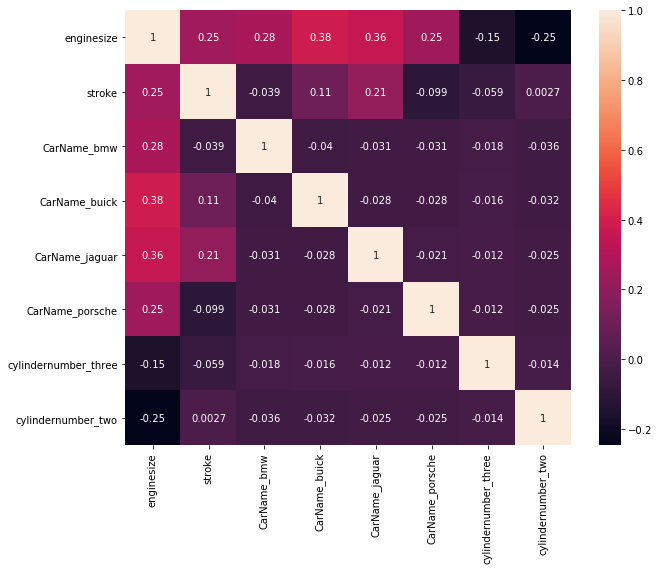

In [127]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8))
sns.heatmap(x_train_rfe.corr(),annot=True)

In [128]:
# removing stroke     it had high vif value 
x_train_rfe.drop('cylindernumber_three',axis=1,inplace=True)

In [129]:
lr_model_6=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     133.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.99e-57
Time:                        22:05:54   Log-Likelihood:                 164.84
No. Observations:                 143   AIC:                            -313.7
Df Residuals:                     135   BIC:                            -290.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0360      0

In [130]:
# VIF value 
vif_6=VIF_cal(x_train_rfe)
vif_6

,Features,VIF
0,enginesize,7.72
1,stroke,5.75
3,CarName_buick,1.32
2,CarName_bmw,1.26
4,CarName_jaguar,1.22
5,CarName_porsche,1.22
6,cylindernumber_two,1.10


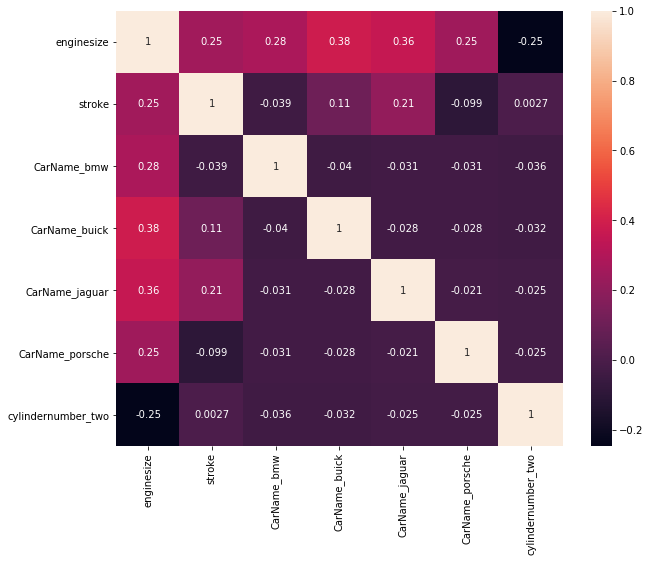

In [131]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8))
sns.heatmap(x_train_rfe.corr(),annot=True)

In [132]:
# removing enginetype_ohc it had high vif value 
x_train_rfe.drop('stroke',axis=1,inplace=True)

In [133]:
lr_model_7=build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.62e-58
Time:                        22:05:55   Log-Likelihood:                 163.01
No. Observations:                 143   AIC:                            -312.0
Df Residuals:                     136   BIC:                            -291.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0734      0

In [134]:
# VIF value 
vif_7=VIF_cal(x_train_rfe)
vif_7

,Features,VIF
0,enginesize,1.59
2,CarName_buick,1.19
1,CarName_bmw,1.16
3,CarName_jaguar,1.14
4,CarName_porsche,1.10
5,cylindernumber_two,1.00


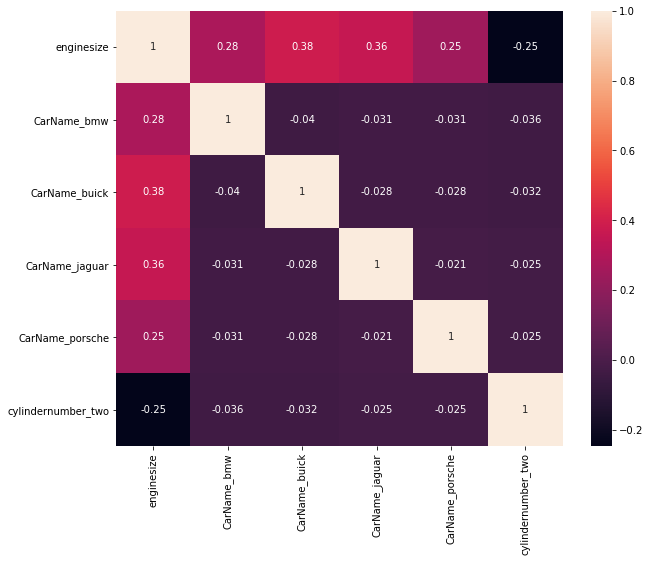

In [135]:
# Heatmap to check corelation between features
plt.figure(figsize=(10,8))
sns.heatmap(x_train_rfe.corr(),annot=True)

- Observations for final model:
    - R-squared     :0.870
    - Adj. R-squared:0.865

## Residual Analysis of the train data

In [136]:
# We are predecting the y predict from the model
x_train_sm=sm.add_constant(x_train_rfe)
y_train_price = lr_model_7.predict(x_train_sm)

In [137]:
# By using original and predicting values of Y we get residuels
res=y_train - y_train_price

Text(0.5, 0, 'Errors')

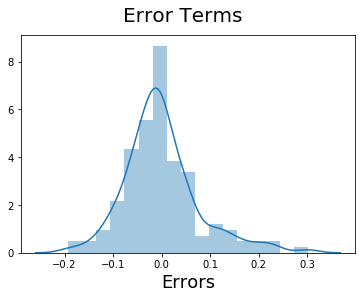

In [138]:
#Plot for error terms it should be normally distributed.
fig=plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)      

- Observations:
    - We can observer all error terms are normal distributed

## Making Predictions on Test data

####  scaling test data

In [139]:
# Scaling test data because we build model on scalled traind data.
df_test[scale_ver]=scaler.fit_transform(df_test[scale_ver])

In [140]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.112903,0.822581,0.564516,0.967742,0.370121,0.486741,0.375212,0.454249,0.371743,0.379032,0.667691,0.654504,0.523088,0.562291,0.393351,0.450941,0.466701,0.209644,0.145161,0.274194,0.177419,0.241935,0.145161,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.319058,0.385142,0.499868,0.178127,0.179970,0.183964,0.208977,0.234487,0.222354,0.249205,0.228484,0.173913,0.243388,0.315452,0.192092,0.258014,0.217041,0.210911,0.355139,0.449749,0.385142,0.431751,0.355139,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.223077,0.515873,0.590164,0.380711,0.250000,0.265306,0.208333,0.290323,0.076536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.327

In [141]:
# Assign price to y var and all other var to x var
y_test=df_test.pop('price')
x_test=df_test

In [142]:
# Cerating X_test data with RFE selected Features
x_test_rfe=x_test[col]
print(x_test_rfe.shape)
# removing features which removed during model building 
x_test_rfe.drop(['curbweight','enginelocation','carwidth','boreratio','cylindernumber_three','stroke'],axis=1,inplace=True)
print(x_test_rfe.shape)

(62, 12)
(62, 6)


In [143]:
# Adding constant to x variable to use statsmodel
print(x_test_rfe.columns)
x_test_sm=sm.add_constant(x_test_rfe)
y_test_price = lr_model_7.predict(x_test_sm)

Index(['enginesize', 'CarName_bmw', 'CarName_buick', 'CarName_jaguar',
       'CarName_porsche', 'cylindernumber_two'],
      dtype='object')


In [144]:
# evalute
res_score=r2_score(y_true=y_test,y_pred=y_test_price)
res_score

0.8065480268539584

In [145]:
#RMSE
mean_squared_error(y_test, y_test_price, squared=False)

0.09201422970135395

Text(0.5, 0, 'Errors')

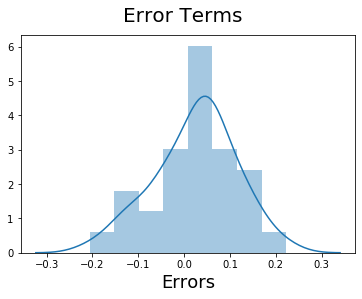

In [146]:
#Plot for error terms it should be normally distributed.
res_test=y_test-y_test_price
fig=plt.figure()
sns.distplot(res_test)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)      

- Observations:
    - The error terms are nomally distributed.

- Conclusion:
    - Error Terms dist plot we can see that the error (y_test-y-pred) is normal distribution and does not follow any pattern.
    - As we can see that the model seems to be stable, The variables that can affect price are:
        - enginesize
        - Car company or model from buick
        - Car company or model from bmw
        - Car company or model from jaguar
        - Car company or model from porsche
        - When two cylinders placed in the car